# <span style="color:blue">A tool for helping deciding which neighborhoods in San Francisco are similar to your preferred neighborhood in Manhattan

## Hello, and welcome!
### This project is an advisory tool to help people that are about to move from Manhattan to San Francisco to decide in which neighbourhood they would like to live in. 

In [1]:
import numpy as np 
import pandas as pd 

import json 

# A package for getting coordinates
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 

from IPython.display import Image

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# map rendering library
import folium 

In [2]:
# conda install shapely

In [3]:
#package for finding the center of shapes
from shapely.geometry import shape 

# San Francisco (SF) Data

### Geojason file can be downloaded from the following link:
 https://cocl.us/sanfran_geojson

In [4]:
# Open the datafile
with open('san-francisco.geojson') as json_data:
    sf_data = json.load(json_data)

In [5]:
sf_neighborhoods_raw = sf_data["features"]

In [7]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
sf_neighborhoods = pd.DataFrame(columns=column_names)

### Find the centers of the neighbourhoods by calculating the centroids

In [8]:
for feature in sf_neighborhoods_raw:
    s = shape(feature["geometry"])
    sf_neighborhoods = sf_neighborhoods.append({
                                          'Neighborhood': feature['properties']['DISTRICT'],
                                          'Latitude': s.centroid.y,
                                          'Longitude': s.centroid.x}, ignore_index=True)

In [9]:
sf_neighborhoods

Neighborhood   Latitude   Longitude
0      CENTRAL  37.798491 -122.409866
1     SOUTHERN  37.792260 -122.391915
2      BAYVIEW  37.737144 -122.389887
3      MISSION  37.757564 -122.422636
4         PARK  37.764442 -122.448333
5     RICHMOND  37.778167 -122.478983
6    INGLESIDE  37.727905 -122.431617
7      TARAVAL  37.736183 -122.483012
8     NORTHERN  37.791176 -122.430508
9   TENDERLOIN  37.783890 -122.412554

###  Creat the map of San Francisco with the neighborhoods

In [10]:
# Coordinates of SF

latitude = 37.773972
longitude = -122.431297

In [11]:
# create map of SF using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(sf_neighborhoods['Latitude'], sf_neighborhoods['Longitude'], sf_neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

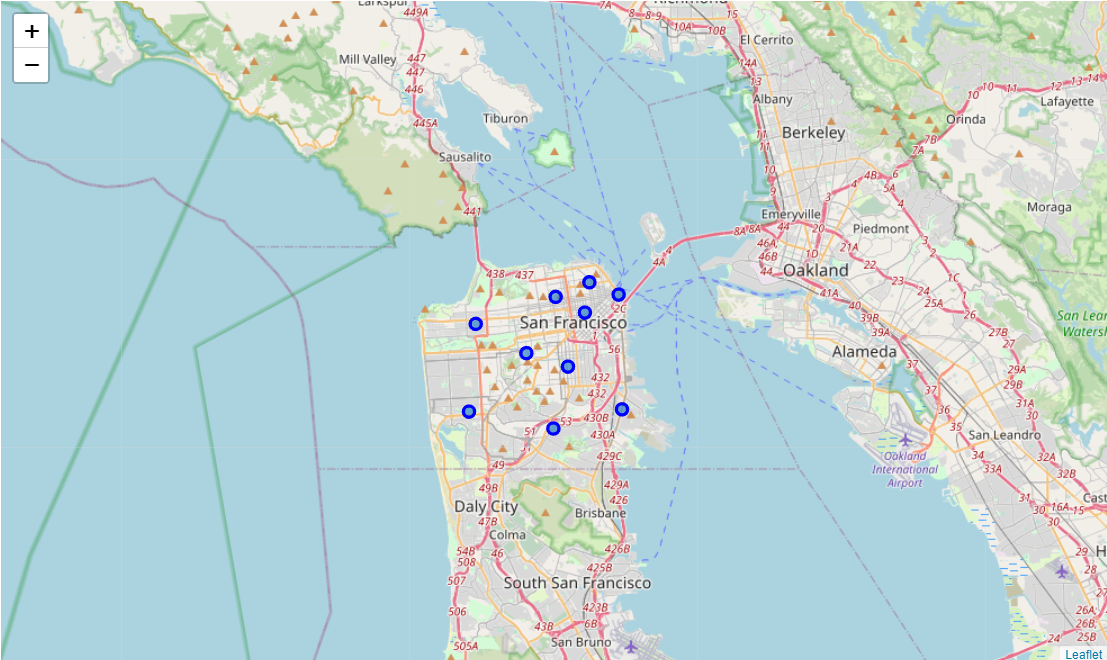

In [9]:
Image(filename="Maps\SF map.png")

# New York data

### Geojason file can be downloaded from the following link:
https://geo.nyu.edu/catalog/nyu_2451_34572

In [12]:
# Open the datafile
with open('newyork_data.json') as json_data:
    ny_data = json.load(json_data)

In [13]:

# define the dataframe columns
column_names_ny = ['Borough','Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names_ny)


In [67]:
# Get list of neighbourhoods for ny
ny_neighborhoods_data = ny_data['features']


In [15]:
# Populate the dataframe in data from the json file for NY
for data in ny_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [16]:
ny_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

### We will be focusing only on neighborhoods in Manhattan

In [17]:
manhattan_data = ny_neighborhoods[ny_neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

## Create map for NY

### Get coordinates of Manhattan

In [18]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

###  Creat the map of Manhattan with the neighborhoods

In [19]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

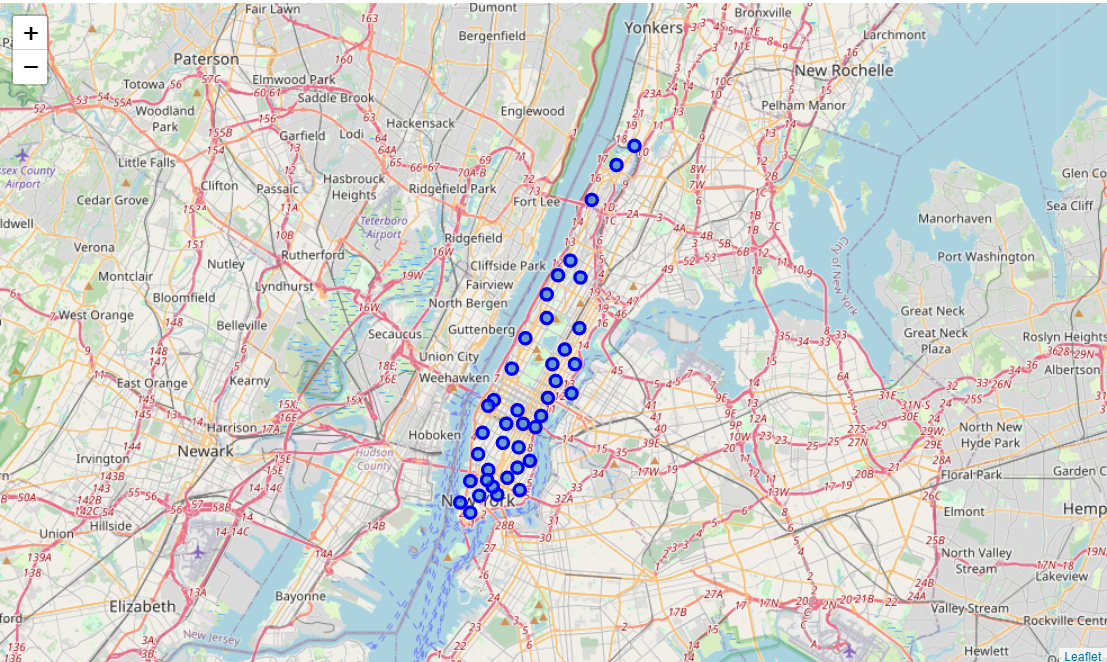

In [10]:
Image(filename='Maps\Manhattan map.png')

In [20]:
# Credentials for Foursquare

In [21]:
# your Foursquare ID
CLIENT_ID = 'XBTPHG4SLH5BGUF44S4RODQQUXEFTZ1LSGNP5L3OCCFWVJBC' 
# your Foursquare Secret
CLIENT_SECRET = 'U524JMFYTFZFHUWAWNO5IEIP3QXJCLQOCZNADOB3NRHHWRBT'
VERSION = '20180605' # Foursquare API version

# Get Venues data

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=100
    radius=500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Asign the venues to NY database

In [23]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [24]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3005, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

### Get dummies

In [25]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Store  \
0                 0                       0  ...            0   
1                 0                       0  ...            0   
2                 0                       0  ...            0   
3                 0                       0  ...            0   
4                 0                       0  ...            0   

   Vietnamese Restaurant  Volleyball Court  Waterfront  Whisky Bar  Wine Bar  \
0                      0                 0           0           0         0   
1                      0                 0           0           0         0   
2                      0                 0           0           0         0   
3                      0                 0           0           0         0   
4                      0                 0           0           0         0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0          0            0              0            0  
1          0            0              0            1  
2          0            0              0            0  
3          0            0              0            0  
4          0            0              0            0  

[5 rows x 330 columns]

### Grouping neighbourhoods and calculating the mean of occurrence for each venue type

In [26]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Battery Park City                0.0             0.0                0.0   
1      Carnegie Hill                0.0             0.0                0.0   
2     Central Harlem                0.0             0.0                0.0   
3            Chelsea                0.0             0.0                0.0   
4          Chinatown                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0            0.000000             0.000000           0.0     0.0   
1            0.000000             0.011628           0.0     0.0   
2            0.066667             0.044444           0.0     0.0   
3            0.000000             0.020408           0.0     0.0   
4            0.000000             0.030000           0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Store  \
0               0.0                0.000000  ...          0.0   
1               0.0                0.011628  ...          0.0   
2               0.0                0.000000  ...          0.0   
3               0.0                0.000000  ...          0.0   
4               0.0                0.000000  ...          0.0   

   Vietnamese Restaurant  Volleyball Court  Waterfront  Whisky Bar  Wine Bar  \
0               0.000000               0.0         0.0         0.0  0.016949   
1               0.023256               0.0         0.0         0.0  0.011628   
2               0.000000               0.0         0.0         0.0  0.000000   
3               0.000000               0.0         0.0         0.0  0.010204   
4               0.020000               0.0         0.0         0.0  0.000000   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0   0.033898          0.0       0.000000     0.000000  
1   0.034884          0.0       0.000000     0.034884  
2   0.000000          0.0       0.000000     0.000000  
3   0.010204          0.0       0.010204     0.000000  
4   0.000000          0.0       0.000000     0.000000  

[5 rows x 330 columns]

In [27]:
manhattan_grouped.shape

(40, 330)

# Asign the venues to SF database

In [28]:
sf_venues = getNearbyVenues(names=sf_neighborhoods['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

CENTRAL
SOUTHERN
BAYVIEW
MISSION
PARK
RICHMOND
INGLESIDE
TARAVAL
NORTHERN
TENDERLOIN


In [29]:
print(sf_venues.shape)
sf_venues.head()

(649, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0      CENTRAL              40.876551               -73.91066       Arturo's   
1      CENTRAL              40.876551               -73.91066    Bikram Yoga   
2      CENTRAL              40.876551               -73.91066  Tibbett Diner   
3      CENTRAL              40.876551               -73.91066      Starbucks   
4      CENTRAL              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

### Get dummies

In [30]:

# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

### Grouping neighbourhoods and calculating the mean for each venue type

sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped.head()



Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0      BAYVIEW           0.011111            0.000000             0.011111   
1      CENTRAL           0.000000            0.000000             0.038462   
2    INGLESIDE           0.000000            0.066667             0.044444   
3      MISSION           0.000000            0.000000             0.035088   
4     NORTHERN           0.000000            0.000000             0.023529   

   Arepa Restaurant  Art Gallery  Art Museum  Asian Restaurant  \
0          0.011111     0.000000    0.000000               0.0   
1          0.000000     0.000000    0.000000               0.0   
2          0.000000     0.022222    0.000000               0.0   
3          0.000000     0.000000    0.000000               0.0   
4          0.000000     0.023529    0.011765               0.0   

   Athletics & Sports  Australian Restaurant  ...  \
0                 0.0                    0.0  ...   
1                 0.0                    0.0  ...   
2                 0.0                    0.0  ...   
3                 0.0                    0.0  ...   
4                 0.0                    0.0  ...   

   Vegetarian / Vegan Restaurant  Veterinarian  Video Game Store  Video Store  \
0                       0.000000      0.000000          0.011111          0.0   
1                       0.000000      0.000000          0.038462          0.0   
2                       0.000000      0.000000          0.000000          0.0   
3                       0.000000      0.017544          0.000000          0.0   
4                       0.011765      0.000000          0.000000          0.0   

   Vietnamese Restaurant  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
0                    0.0  0.011111   0.022222          0.0       0.011111   
1                    0.0  0.000000   0.000000          0.0       0.000000   
2                    0.0  0.000000   0.000000          0.0       0.000000   
3                    0.0  0.035088   0.017544          0.0       0.000000   
4                    0.0  0.000000   0.035294          0.0       0.011765   

   Yoga Studio  
0     0.000000  
1     0.038462  
2     0.000000  
3     0.017544  
4     0.035294  

[5 rows x 182 columns]

In [31]:
sf_grouped.shape

(10, 182)

### Grouping neighbourhoods and calculating the mean of occurrence for each venue type

In [32]:

sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped.head()



Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0      BAYVIEW           0.011111            0.000000             0.011111   
1      CENTRAL           0.000000            0.000000             0.038462   
2    INGLESIDE           0.000000            0.066667             0.044444   
3      MISSION           0.000000            0.000000             0.035088   
4     NORTHERN           0.000000            0.000000             0.023529   

   Arepa Restaurant  Art Gallery  Art Museum  Asian Restaurant  \
0          0.011111     0.000000    0.000000               0.0   
1          0.000000     0.000000    0.000000               0.0   
2          0.000000     0.022222    0.000000               0.0   
3          0.000000     0.000000    0.000000               0.0   
4          0.000000     0.023529    0.011765               0.0   

   Athletics & Sports  Australian Restaurant  ...  \
0                 0.0                    0.0  ...   
1                 0.0                    0.0  ...   
2                 0.0                    0.0  ...   
3                 0.0                    0.0  ...   
4                 0.0                    0.0  ...   

   Vegetarian / Vegan Restaurant  Veterinarian  Video Game Store  Video Store  \
0                       0.000000      0.000000          0.011111          0.0   
1                       0.000000      0.000000          0.038462          0.0   
2                       0.000000      0.000000          0.000000          0.0   
3                       0.000000      0.017544          0.000000          0.0   
4                       0.011765      0.000000          0.000000          0.0   

   Vietnamese Restaurant  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
0                    0.0  0.011111   0.022222          0.0       0.011111   
1                    0.0  0.000000   0.000000          0.0       0.000000   
2                    0.0  0.000000   0.000000          0.0       0.000000   
3                    0.0  0.035088   0.017544          0.0       0.000000   
4                    0.0  0.000000   0.035294          0.0       0.011765   

   Yoga Studio  
0     0.000000  
1     0.038462  
2     0.000000  
3     0.017544  
4     0.035294  

[5 rows x 182 columns]

In [33]:
sf_grouped.shape

(10, 182)

# Making a list of simmilar neighborhoods in San Francisco to each neighborhoods in Manhatten

## We iterate over the Manhatten neighborhoods names, and for each neighborhood we cluster it together with San Francisco neighborhoods using k-means.
## We will have a table in which each row represents a neighborhood from Manhatten and contains the clusters numbers for each neighborhood in San Francisco

In [34]:
from sklearn.cluster import KMeans
kclusters = 5
sf_grouped_clustering = sf_grouped

In [35]:
all_kmeans=pd.DataFrame()
#Get the data for the specific NY neighbourhood that the user had chosen
for index,ny_neighbourhood in manhattan_grouped.iterrows():
    
    comb_grouped_clustering= sf_grouped_clustering.append(ny_neighbourhood, sort=False)
    comb_grouped_clustering.fillna(0,inplace=True)
    neighbourhoods_names=comb_grouped_clustering[['Neighborhood']]
    comb_grouped_clustering=comb_grouped_clustering.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comb_grouped_clustering)
    
    all_kmeans=all_kmeans.append([kmeans.labels_], ignore_index=True)
all_kmeans.head()

0  1  2  3  4  5  6  7  8  9  10
0  1  0  2  1  2  1  1  2  4  2   3
1  2  3  0  2  1  2  2  1  4  1   1
2  1  0  2  1  3  1  1  3  4  3   2
3  0  2  1  0  1  0  0  1  3  1   4
4  0  2  1  0  4  0  4  1  3  4   1

### Rename the columns to the corresponding neighbourhoods names

In [36]:
all_kmeans.rename(columns=sf_neighborhoods['Neighborhood'], inplace=True)

In [37]:
all_kmeans.rename(columns={10:'NY'}, inplace=True)

In [38]:
all_kmeans.head()

CENTRAL  SOUTHERN  BAYVIEW  MISSION  PARK  RICHMOND  INGLESIDE  TARAVAL  \
0        1         0        2        1     2         1          1        2   
1        2         3        0        2     1         2          2        1   
2        1         0        2        1     3         1          1        3   
3        0         2        1        0     1         0          0        1   
4        0         2        1        0     4         0          4        1   

   NORTHERN  TENDERLOIN  NY  
0         4           2   3  
1         4           1   1  
2         4           3   2  
3         3           1   4  
4         3           4   1

# Count the number of times each neighbourhood was clustered with a Manhatten neighborhood

### The following code finds the cluster of the MAnhattan neighborhood and turn all the neighborhoods that were clustered together into 1. All the other neighborhoods will get the value of -1

In [39]:
count_neighbourhoods=pd.DataFrame()
all_kmeans_calc=all_kmeans.copy()

for index, row in all_kmeans_calc.iterrows():
    #Get the cluster number for a specific row
    cluster_num=row.iloc[-1]
    # Asign -1 value to all neighbourhoods which are not in the cluster of the neighborhood from NY
    row[~row.isin([cluster_num])]= -1
    row[row.isin([cluster_num])]= 1
all_kmeans_calc.head()

CENTRAL  SOUTHERN  BAYVIEW  MISSION  PARK  RICHMOND  INGLESIDE  TARAVAL  \
0       -1        -1       -1       -1    -1        -1         -1       -1   
1       -1        -1       -1       -1     1        -1         -1        1   
2       -1        -1        1       -1    -1        -1         -1       -1   
3       -1        -1       -1       -1    -1        -1         -1       -1   
4       -1        -1        1       -1    -1        -1         -1        1   

   NORTHERN  TENDERLOIN  NY  
0        -1          -1   1  
1        -1           1   1  
2        -1          -1   1  
3        -1          -1   1  
4        -1          -1   1

### Count all the times that each neighbourhood was in the cluster of the NY neighborhood (not equal -1)

In [47]:
all_kmeans_sum= all_kmeans_calc[all_kmeans_calc!=-1].count()
#sort the neighbourhood by the most simillar to MAnhatten neighborhoods
all_kmeans_sum=all_kmeans_sum.sort_values(ascending=False)

all_kmeans_sum

NY            40
PARK          22
TENDERLOIN    19
INGLESIDE     11
TARAVAL        7
BAYVIEW        5
RICHMOND       4
MISSION        4
CENTRAL        4
NORTHERN       2
SOUTHERN       1
dtype: int64

### Orginize the global similarity counts into a dataframe that will be used for visualization

In [48]:
all_kmeans_sum=all_kmeans_sum.to_frame()
all_kmeans_sum

0
NY          40
PARK        22
TENDERLOIN  19
INGLESIDE   11
TARAVAL      7
BAYVIEW      5
RICHMOND     4
MISSION      4
CENTRAL      4
NORTHERN     2
SOUTHERN     1

In [49]:
all_kmeans_sum=all_kmeans_sum.reset_index()

In [50]:
all_kmeans_sum.sort_values(by='index', ascending=False)

index   0
2   TENDERLOIN  19
4      TARAVAL   7
10    SOUTHERN   1
6     RICHMOND   4
1         PARK  22
0           NY  40
9     NORTHERN   2
7      MISSION   4
3    INGLESIDE  11
8      CENTRAL   4
5      BAYVIEW   5

In [51]:
all_kmeans_sum.columns=['Neighborhood','value']

# Delete the last row which the NY neighborhood
all_kmeans_sum=all_kmeans_sum.head(10)
all_kmeans_sum

Neighborhood  value
0           NY     40
1         PARK     22
2   TENDERLOIN     19
3    INGLESIDE     11
4      TARAVAL      7
5      BAYVIEW      5
6     RICHMOND      4
7      MISSION      4
8      CENTRAL      4
9     NORTHERN      2

### Bring back the neighborhoods names to the all_kmeans_calc dataframe 

In [52]:
all_kmeans_calc['Neighborhood']=manhattan_grouped['Neighborhood']
all_kmeans_calc.set_index('Neighborhood', inplace=True)
all_kmeans_calc.head()


CENTRAL  SOUTHERN  BAYVIEW  MISSION  PARK  RICHMOND  \
Neighborhood                                                             
Battery Park City       -1        -1       -1       -1    -1        -1   
Carnegie Hill           -1        -1       -1       -1     1        -1   
Central Harlem          -1        -1        1       -1    -1        -1   
Chelsea                 -1        -1       -1       -1    -1        -1   
Chinatown               -1        -1        1       -1    -1        -1   

                   INGLESIDE  TARAVAL  NORTHERN  TENDERLOIN  NY  
Neighborhood                                                     
Battery Park City         -1       -1        -1          -1   1  
Carnegie Hill             -1        1        -1           1   1  
Central Harlem            -1       -1        -1          -1   1  
Chelsea                   -1       -1        -1          -1   1  
Chinatown                 -1        1        -1          -1   1

 # <span style="color:blue">  Ask the user from which neighbourhood he is moving from 

In [56]:
ny_neighbourhood= input ('From which neighbourhood in Manhattan are you moving from? ')
ny_neighbourhood

From which neighbourhood in Manhattan are you moving from? Upper West Side


'Upper West Side'

### Get only the cluster of neighbourhoods that corresponds with the user choice of NY neighborhood to compare

In [57]:
user_cluster= all_kmeans_calc.loc[ny_neighbourhood][all_kmeans_calc.loc[ny_neighbourhood]!=-1]
user_cluster

PARK          1
INGLESIDE     1
TENDERLOIN    1
NY            1
Name: Upper West Side, dtype: int64

In [58]:
user_cluster= user_cluster.to_frame()
user_cluster

Upper West Side
PARK                      1
INGLESIDE                 1
TENDERLOIN                1
NY                        1

In [59]:
user_cluster=user_cluster.reset_index()

user_cluster

index  Upper West Side
0        PARK                1
1   INGLESIDE                1
2  TENDERLOIN                1
3          NY                1

In [60]:
user_cluster.columns=['Neighborhood','value']
user_cluster

Neighborhood  value
0         PARK      1
1    INGLESIDE      1
2   TENDERLOIN      1
3           NY      1

# Results visualization

### The neighbourhoods in SF that where clustered together with the Manhattan neighbourhood that the user had chosen are highlited in<span style="color:red"> red

In [61]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [62]:
latitude = 37.773972
longitude = -122.431297

# create map
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [63]:

sf_map.choropleth(
    geo_data='san-francisco.geojson',
    data=user_cluster,
    columns=['Neighborhood','value'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
  
  

)
for lat, lng, label in zip(sf_neighborhoods['Latitude'], sf_neighborhoods['Longitude'], sf_neighborhoods['Neighborhood']):

    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sf_map)  

# display map
sf_map

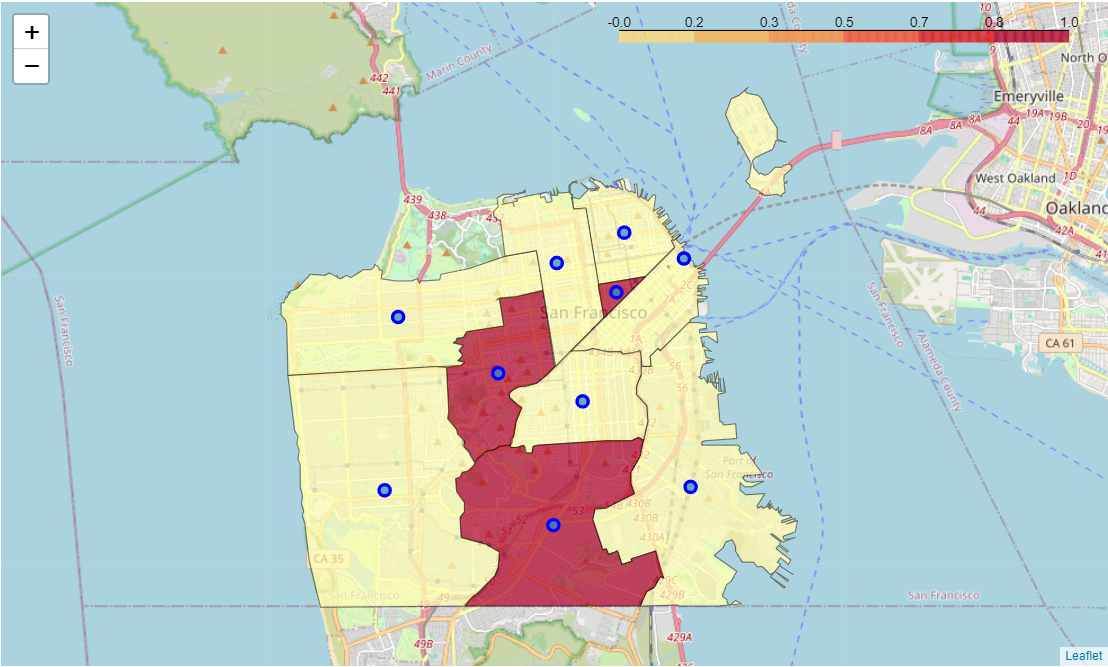

In [11]:
Image(filename='Maps\SF map results.png')

# Show a map of the neighborhoods in San Francisco that are the most similar to Manhatten neighborhoods.
## The more toward<span style="color:red"> red <span style="color:black">meaning the neighborhood was clustered more times with neighborhoods from Manhatten.

In [64]:
latitude = 37.773972
longitude = -122.431297
# create map
sf_map_all = folium.Map(location=[latitude, longitude], zoom_start=12)


In [65]:
sf_map_all.choropleth(
    geo_data='san-francisco.geojson',
    data=all_kmeans_sum,
    columns=['Neighborhood','value'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
  
  

)
for lat, lng, label in zip(sf_neighborhoods['Latitude'], sf_neighborhoods['Longitude'], sf_neighborhoods['Neighborhood']):

    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sf_map_all)  

# display map
sf_map_all

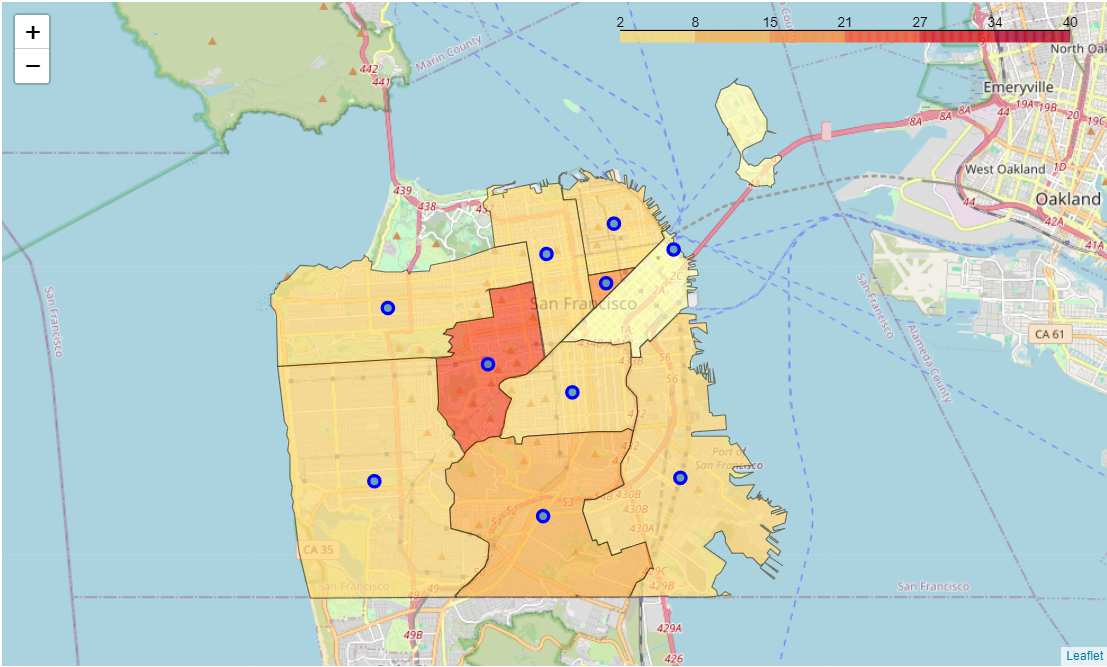

In [12]:
Image(filename='Maps\SF map results color coded.png')